In [2]:
import pandas as pd
df = pd.DataFrame([['1990', 'a', 5, 4, 7, 2], ['1991', 'c', 10, 1, 2, 0], ['1992', 'd', 2, 1, 4, 12], ['1993', 'a', 5, 8, 11, 6]], columns=('Date', 'best', 'a', 'b', 'c', 'd'))

In [3]:
df

,Date,best,a,b,c,d
0,1990,a,5,4,7,2
1,1991,c,10,1,2,0
2,1992,d,2,1,4,12
3,1993,a,5,8,11,6


In [8]:
print(df.to_string())

   Date best   a  b   c   d
0  1990    a   5  4   7   2
1  1991    c  10  1   2   0
2  1992    d   2  1   4  12
3  1993    a   5  8  11   6


In [16]:
df.to_csv('new.csv') # converts to csv file from data frame
df.to_csv('new.csv',columns=['a','b'],index=False,header=None)

In [7]:
#NumPy representation and is fast and doesn’t require copying data. its a raw data
df.to_numpy()  #or np.asarray(df)

array([['1990', 'a', 5, 4, 7, 2],
       ['1991', 'c', 10, 1, 2, 0],
       ['1992', 'd', 2, 1, 4, 12],
       ['1993', 'a', 5, 8, 11, 6]], dtype=object)

In [14]:
df['a'].tolist() #only series can to list

[5, 10, 2, 5]

In [10]:
df.to_json('new.json')#converts to json

In [35]:
import pandas as pd
df9 = pd.DataFrame([['1990', 'a', 5, 'n.a', 7, 2], ['1991', 'c', 10, 1, 2, 0], ['1992', 'd', 2, 1, 'not', 12], ['1993', 'a', 5, 8, 11, 6]], columns=('Date', 'best', 'a', 'b', 'c', 'd'))
df9.to_excel('newexcel.xlsx') #df.to_excel(file,sheet_name='name',startcol=2,startrow=1,index=False)
df9

,Date,best,a,b,c,d
0,1990,a,5,n.a,7,2
1,1991,c,10,1,2,0
2,1992,d,2,1,not,12
3,1993,a,5,8,11,6


In [32]:
def convert(cell):
    if cell=='not':
        return 'Nan'
    return cell
    
df10=pd.read_excel('newexcel.xlsx',converters={
    'c':convert
})
df10

,Unnamed: 0,Date,best,a,b,c,d
0,0,1990,a,5,n.a,7,2
1,1,1991,c,10,1,2,0
2,2,1992,d,2,1,Nan,12
3,3,1993,a,5,8,11,6


In [36]:
#2 datatframes to 2 different sheets of single excel file

In [5]:
df = pd.DataFrame([['1990', 'a', 5, 4, 7, 2], ['1991', 'c', 10, 1, 2, 0], ['1992', 'd', 2, 1, 4, 12], ['1993', 'a', 5, 8, 11, 6]], columns=('Date', 'best', 'a', 'b', 'c', 'd'))
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
df1=pd.DataFrame(data)

In [9]:
with pd.ExcelWriter('combined.xlsx') as writer:
    df.to_excel(writer,sheet_name='new')
    df1.to_excel(writer,sheet_name='new1') # adds to specified sheet

In [5]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
df=pd.DataFrame(data)
df

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [7]:
df.pivot(index='year',columns='wins')

team                                        losses                  \
wins     4      6      8      10       11       15     4     6    8    10   
year                                                                        
2010    NaN  Lions    NaN    NaN    Bears      NaN    NaN  10.0  NaN  NaN   
2011    NaN    NaN  Bears  Lions      NaN  Packers    NaN   NaN  8.0  6.0   
2012  Lions    NaN    NaN  Bears  Packers      NaN   12.0   NaN  NaN  6.0   

                
wins   11   15  
year            
2010  5.0  NaN  
2011  NaN  1.0  
2012  5.0  NaN

In [9]:
df.pivot(index='year',columns='wins',values='losses') #only losses willget

wins,4,6,8,10,11,15
year,,,,,,
2010,NaN,10.0,NaN,NaN,5.0,NaN
2011,NaN,NaN,8.0,6.0,NaN,1.0
2012,12.0,NaN,NaN,6.0,5.0,NaN


In [16]:
df=pd.read_excel('D.xlsx')
df

,day,temperature,humidity,city
0,2017-01-01,32.0,6,mumbai
1,2017-01-01,45.0,9,mumbai
2,2017-01-05,28.0,4,mumbai
3,2017-01-05,12.0,7,mumbai
4,2017-01-01,32.0,3,newyork
5,2017-01-05,NaN,66,newyork
6,2017-01-01,98.0,8,newyork
7,2017-01-01,34.0,8,newyork
8,2017-01-05,40.0,12,newyork


In [19]:
df.pivot_table(index='city',columns='day') #aggregate

humidity            temperature           
day     2017-01-01 2017-01-05  2017-01-01 2017-01-05
city                                                
mumbai    7.500000        5.5   38.500000       20.0
newyork   6.333333       39.0   54.666667       40.0

In [22]:
df.pivot_table(index='city',columns='day',aggfunc='mean') #aggfuc we can use any mathematical fuctions.

humidity            temperature           
day     2017-01-01 2017-01-05  2017-01-01 2017-01-05
city                                                
mumbai    7.500000        5.5   38.500000       20.0
newyork   6.333333       39.0   54.666667       40.0

In [23]:
df.pivot_table(index='city',columns='day',margins=True)

humidity                                    temperature  \
day     2017-01-01 00:00:00 2017-01-05 00:00:00    All 2017-01-01 00:00:00   
city                                                                         
mumbai             7.500000            5.500000  6.500           38.500000   
newyork            6.333333           39.000000  7.750           54.666667   
All                6.800000            7.666667  7.125           48.200000   

                                     
day     2017-01-05 00:00:00     All  
city                                 
mumbai            20.000000  29.250  
newyork           40.000000  51.000  
All               26.666667  40.125

In [26]:
df=pd.read_excel('D.xlsx',sheet_name='Sheet2')
df

,day,temperature,humidity,city
0,2017-01-01,32.0,6,mumbai
1,2017-01-01,45.0,9,mumbai
2,2017-01-05,28.0,4,mumbai
3,2017-01-05,12.0,7,mumbai
4,2017-01-01,32.0,3,mumbai
5,2017-01-02,NaN,66,mumbai


In [30]:
df['day']=pd.to_datetime(df['day'])
df

,day,temperature,humidity,city
0,2017-01-01,32.0,6,mumbai
1,2017-01-01,45.0,9,mumbai
2,2017-01-05,28.0,4,mumbai
3,2017-01-05,12.0,7,mumbai
4,2017-01-01,32.0,3,mumbai
5,2017-01-02,NaN,66,mumbai


In [32]:
df.pivot_table(index=pd.Grouper(freq='M',key='day'),columns='city') #M month

,humidity,temperature
city,mumbai,mumbai
day,,
2017-01-31,15.833333,29.8


In [46]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
df1=pd.DataFrame(data)
df1

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [45]:
df=pd.melt(df1,id_vars=['year'])
df

,year,variable,value
0,2010,team,Bears
1,2011,team,Bears
2,2012,team,Bears
3,2011,team,Packers
4,2012,team,Packers
5,2010,team,Lions
6,2011,team,Lions
7,2012,team,Lions
8,2010,wins,11
9,2011,wins,8


In [49]:
df=pd.melt(df1,id_vars=['year'],var_name='wins',value_name='team')
df

C:\Users\nakka\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,wins,team
0,2010,team,Bears
1,2011,team,Bears
2,2012,team,Bears
3,2011,team,Packers
4,2012,team,Packers
5,2010,team,Lions
6,2011,team,Lions
7,2012,team,Lions
8,2010,wins,11
9,2011,wins,8


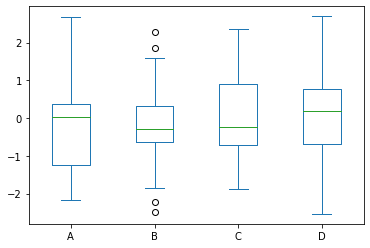

In [50]:
import pandas as pd
import numpy as np
data = np.random.randn(25, 4)
df = pd.DataFrame(data, columns=list('ABCD'))
ax = df.plot.box()

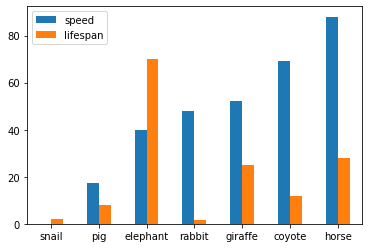

In [52]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

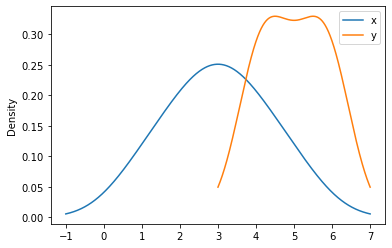

In [53]:
df = pd.DataFrame({
    'x': [1, 2, 2.5, 3, 3.5, 4, 5],
    'y': [4, 4, 4.5, 5, 5.5, 6, 6],
})
ax = df.plot.kde()

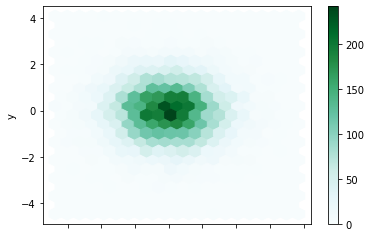

In [54]:
n = 10000
df = pd.DataFrame({'x': np.random.randn(n),
                   'y': np.random.randn(n)})
ax = df.plot.hexbin(x='x', y='y', gridsize=20)

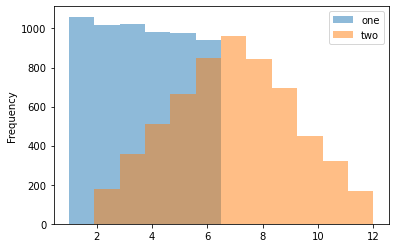

In [55]:
df = pd.DataFrame(
    np.random.randint(1, 7, 6000),
    columns = ['one'])
df['two'] = df['one'] + np.random.randint(1, 7, 6000)
ax = df.plot.hist(bins=12, alpha=0.5)

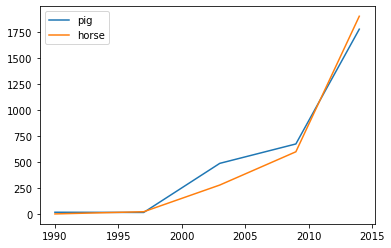

In [57]:
df = pd.DataFrame({
   'pig': [20, 18, 489, 675, 1776],
   'horse': [4, 25, 281, 600, 1900]
   }, index=[1990, 1997, 2003, 2009, 2014])
lines = df.plot.line()

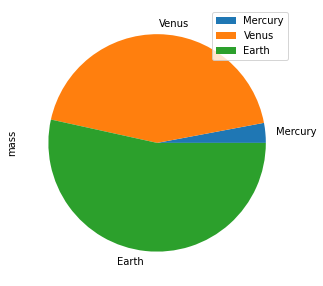

In [58]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(5, 5))

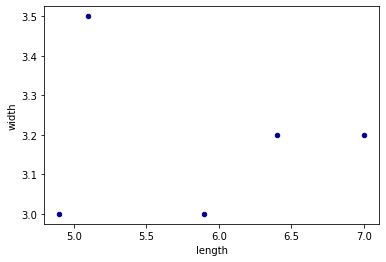

In [59]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                   [6.4, 3.2, 1], [5.9, 3.0, 2]],
                  columns=['length', 'width', 'species'])
ax1 = df.plot.scatter(x='length',
                      y='width',
                      c='DarkBlue')